In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     2
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [4]:
df[['Glucose','BloodPressure','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','DiabetesPedigreeFunction','Age']].fillna(df[['Glucose','BloodPressure','DiabetesPedigreeFunction','Age']].mean())

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X=df.iloc[0:,0:8]
y=df['Outcome']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [8]:
tree = DecisionTreeClassifier(max_depth=2,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [9]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.7727272727272727

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [12]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7337662337662337

In [14]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

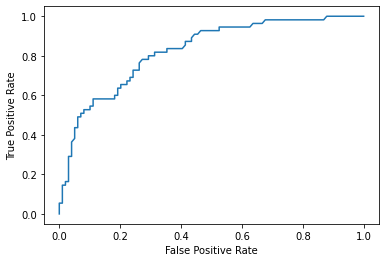

In [15]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
auc

0.8251606978879706